In [226]:
#1
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,roc_curve,roc_auc_score,auc

In [227]:
#2
df=pd.read_csv('adult.csv',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [228]:
#3
rows,cols=df.shape

In [229]:
rows

32561

In [230]:
cols

15

In [231]:
df.columns=[ "age", "workclass", "fnlwgt", "education", "education_num","marital_status", "occupation", "relationship", "race","sex", "capital_gain", "capital_loss", "hours_per_week","native_country", "income"]
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [232]:
df.info()#explores categoric variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [233]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [234]:
categoric_cols=['workclass','education','marital_status','occupation','relationship','race','sex','native_country','income']
df[categoric_cols].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [235]:
for col in categoric_cols:
    print(df[col].value_counts())
    print('-------------------------------------')


workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64
-------------------------------------
education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64
-------------------------------------
marital_status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Na

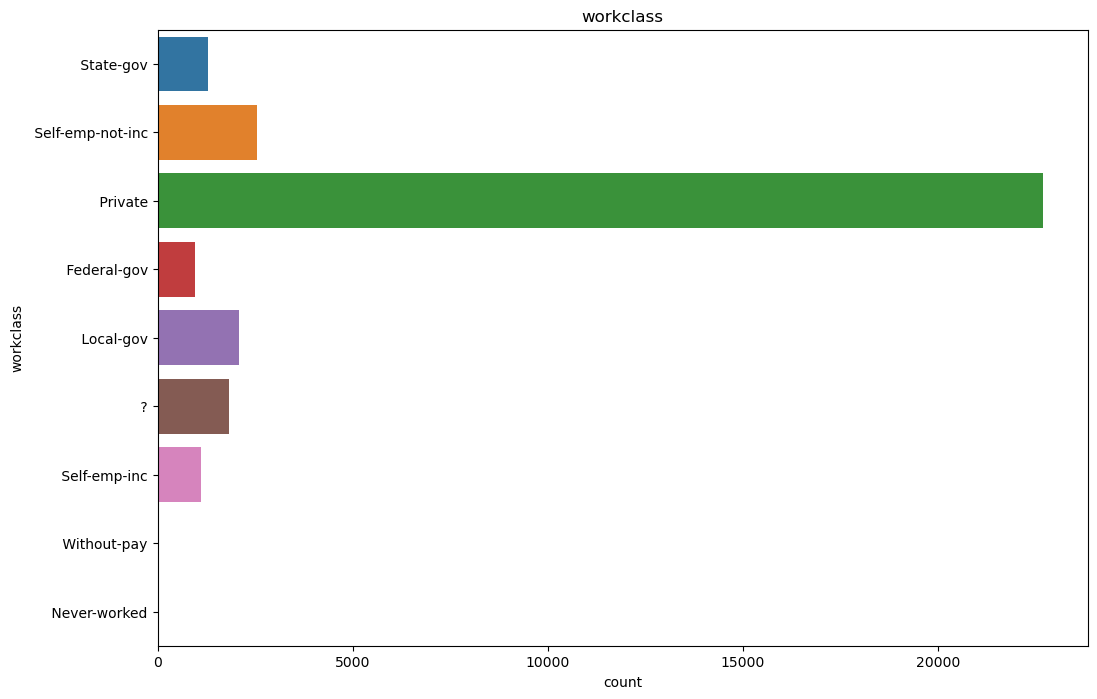

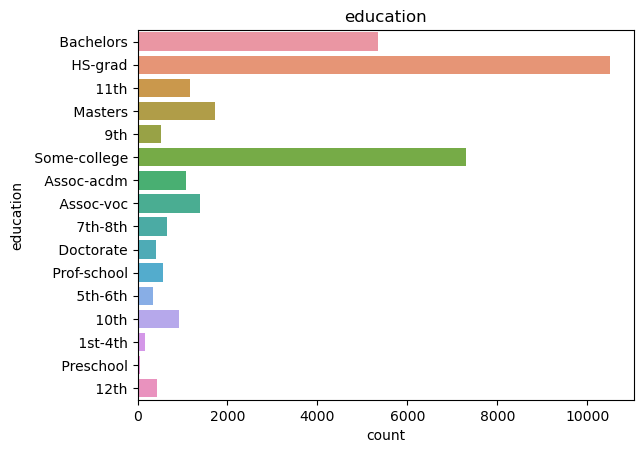

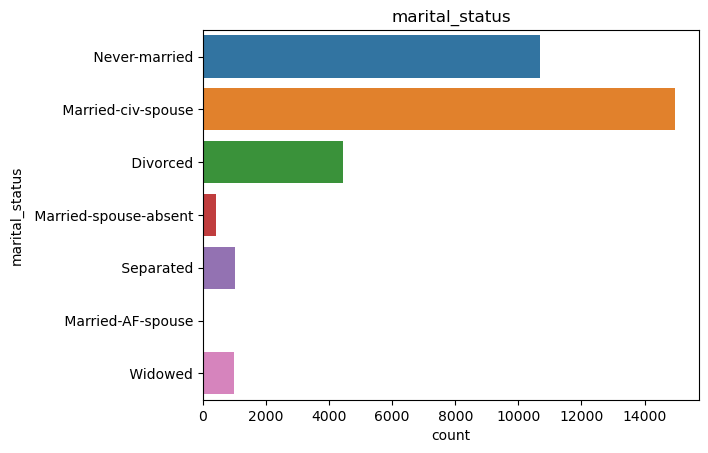

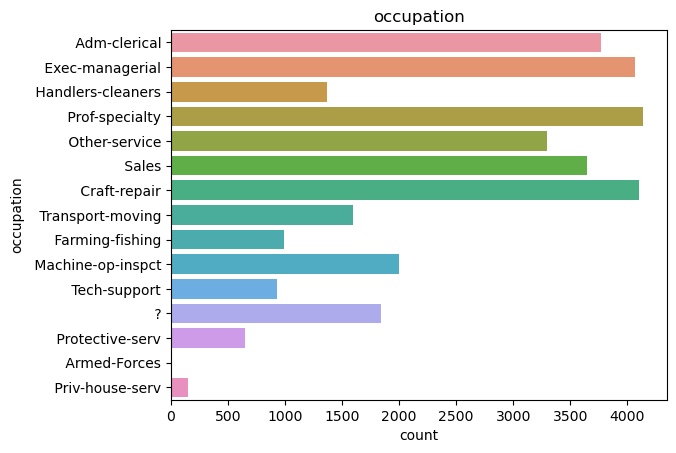

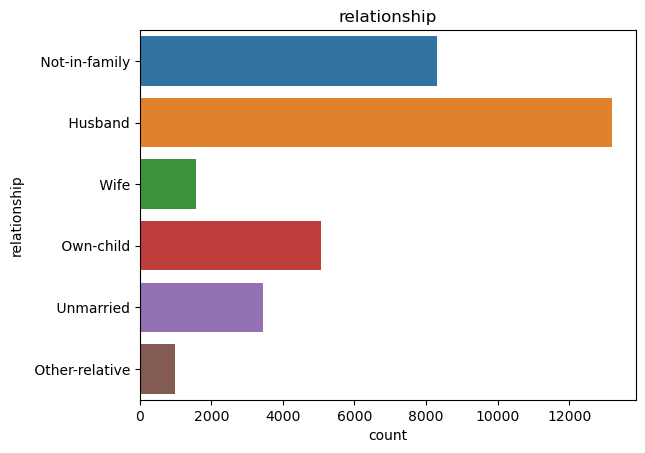

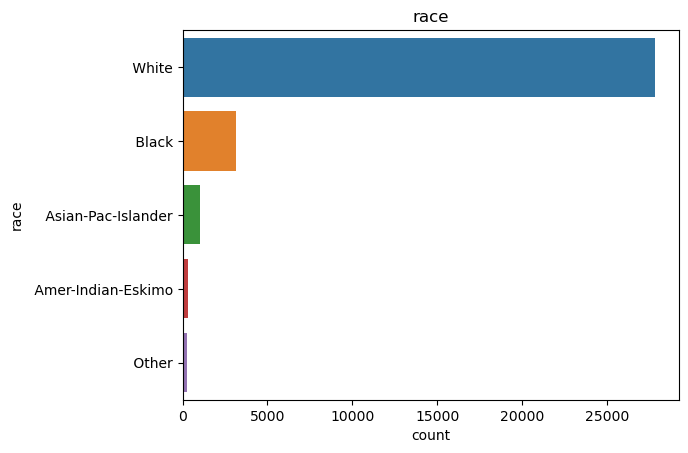

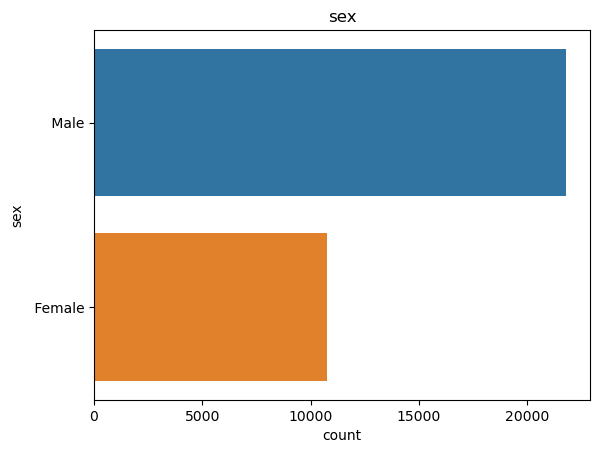

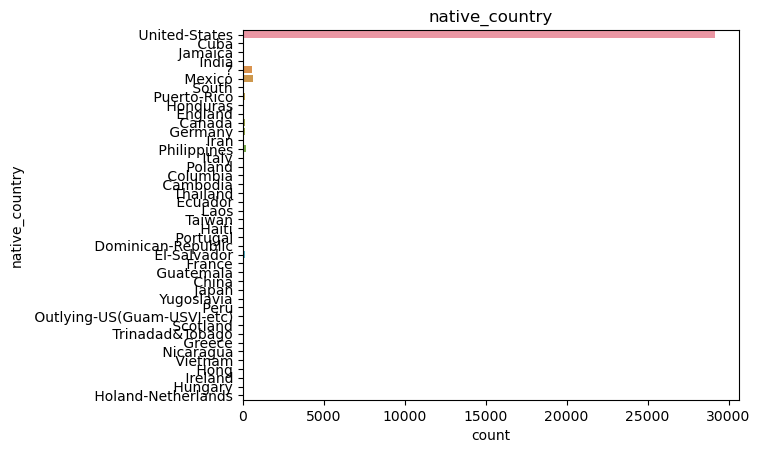

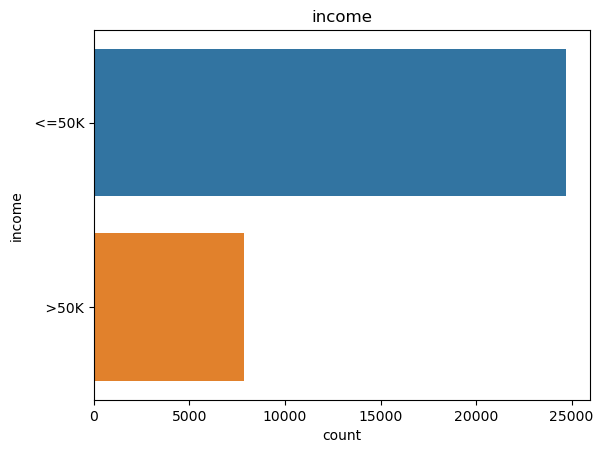

In [236]:
# View frequency distribution of categorical variables

plt.figure(figsize=(12, 8))
for col in categoric_cols:
    sns.countplot(data=df, y=col)
    plt.title(col)
    plt.show()


In [237]:
print(df['workclass'].unique())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


<Axes: xlabel='count', ylabel='workclass'>

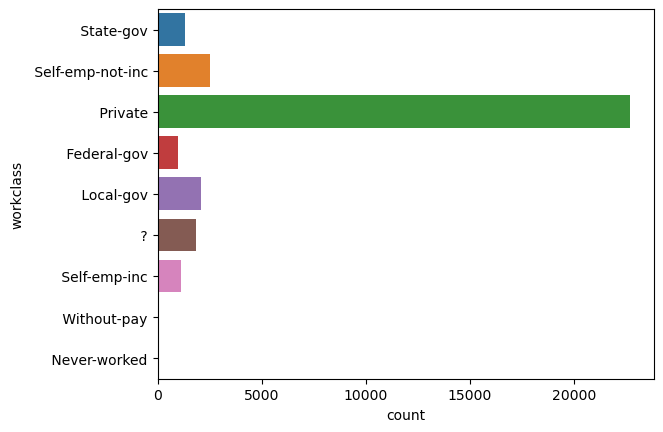

In [238]:
sns.countplot(data=df,y=df['workclass'])

In [239]:
# Replace '?' with NaN in the 'workclass' column, handling leading/trailing spaces
df['workclass'] = df['workclass'].replace('^\s*\?\s*$', np.nan, regex=True)

In [240]:
print(df['occupation'].unique())

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']


<Axes: xlabel='count', ylabel='occupation'>

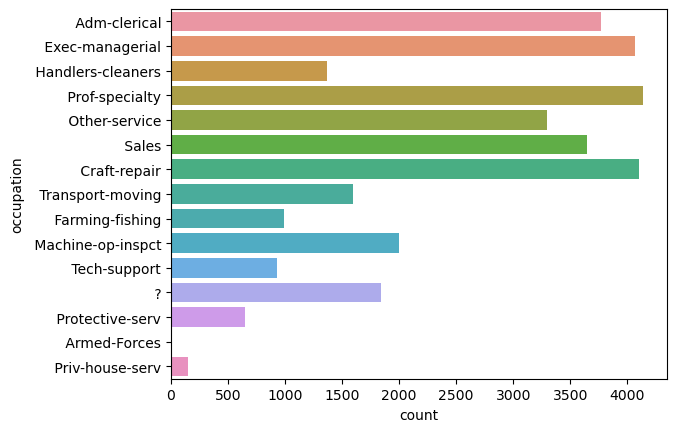

In [241]:
sns.countplot(data=df,y=df['occupation'])

In [242]:
df['occupation']=df['occupation'].replace('^\s*\?\s*$', np.nan, regex=True)

<Axes: xlabel='count', ylabel='native_country'>

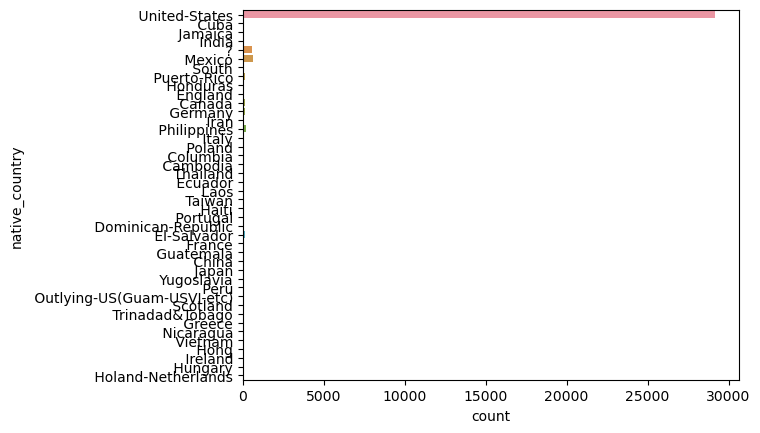

In [243]:
sns.countplot(data=df,y=df['native_country'])

In [244]:
df['native_country']=df['native_country'].replace('^\s*\?\s*$', np.nan, regex=True)

In [245]:
df[categoric_cols].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

In [246]:
numeric_var=['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']
df[numeric_var].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

In [247]:
#4
feature_vector=df.iloc[:,0:14]
target_variable=df[['income']]
le=LabelEncoder()
target_variable=target_variable.apply(le.fit_transform)

In [248]:
#5
x_train,x_test,y_train,y_test=train_test_split(feature_vector,target_variable,test_size=0.2,random_state=23)

In [249]:
#6
fv_categoric_cols=['workclass','education','marital_status','occupation','relationship','race','sex','native_country']
for col in x_train[fv_categoric_cols]:
    print('Percentage of missing value in',col ,'train_set is',((x_train[col].isnull().sum()/len(x_train[col]))*100))

Percentage of missing value in workclass train_set is 5.628071253071253
Percentage of missing value in education train_set is 0.0
Percentage of missing value in marital_status train_set is 0.0
Percentage of missing value in occupation train_set is 5.647266584766585
Percentage of missing value in relationship train_set is 0.0
Percentage of missing value in race train_set is 0.0
Percentage of missing value in sex train_set is 0.0
Percentage of missing value in native_country train_set is 1.8312346437346436


In [250]:
#7
print('Columns with missing values are')
for col in x_train[fv_categoric_cols]:
    if x_train[col].isnull().sum()/len(x_train[col])*100>0:
        print(col)

Columns with missing values are
workclass
occupation
native_country


In [251]:
#8

x_train['workclass']=x_train['workclass'].fillna(x_train['workclass'].mode())
x_train['occupation']=x_train['occupation'].fillna(x_train['occupation'].mode())
x_train['workclass']=x_train['native_country'].fillna(x_train['native_country'].mode())
    


In [252]:
#9
x_train[fv_categoric_cols]=x_train[fv_categoric_cols].apply(le.fit_transform)


In [253]:
#10
scaler=MinMaxScaler()
x_train[numeric_var]=scaler.fit_transform(x_train[numeric_var])

In [254]:
x_train

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
339,0.383562,38,0.165067,11,0.533333,2,7,0,2,1,0.0,0.0,0.397959,38
8317,0.000000,38,0.129085,11,0.533333,4,11,3,4,0,0.0,0.0,0.193878,38
14707,0.383562,38,0.122463,10,1.000000,2,3,0,4,1,0.0,0.0,0.602041,38
20891,0.575342,38,0.103530,15,0.600000,4,0,3,4,0,0.0,0.0,0.336735,38
24766,0.410959,10,0.097344,9,0.800000,0,7,1,4,0,0.0,0.0,0.244898,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11190,0.013699,38,0.075986,15,0.600000,4,0,3,4,0,0.0,0.0,0.244898,38
26569,0.136986,41,0.214271,9,0.800000,4,7,1,4,1,0.0,0.0,0.295918,41
9256,0.260274,38,0.199879,11,0.533333,2,6,0,4,1,0.0,0.0,0.397959,38
29414,0.219178,38,0.051106,11,0.533333,0,0,4,4,0,0.0,0.0,0.397959,38


In [255]:
#11
nb=GaussianNB()
nb.fit(x_train,y_train)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [256]:
#12
print('Columns with missing values are(test set)')
for col in x_test[fv_categoric_cols]:
    if x_test[col].isnull().sum()/len(x_train[col])*100>0:
        print(col)


Columns with missing values are(test set)
workclass
occupation
native_country


In [257]:
x_test['workclass']=x_test['workclass'].fillna(x_test['workclass'].mode())
x_test['occupation']=x_test['occupation'].fillna(x_test['occupation'].mode())
x_test['workclass']=x_test['native_country'].fillna(x_test['native_country'].mode())
x_test[fv_categoric_cols]=x_test[fv_categoric_cols].apply(le.fit_transform)
x_test[numeric_var]=scaler.fit_transform(x_test[numeric_var])
x_test


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
22466,0.315068,37,0.181610,11,0.533333,2,5,0,4,1,0.000000,0.0,0.632653,37
1826,0.068493,5,0.162611,11,0.533333,4,9,4,4,0,1.000000,0.0,0.397959,5
6377,0.397260,37,0.300791,1,0.400000,2,13,0,2,1,0.000000,0.0,0.397959,37
19643,0.452055,37,0.163914,12,0.866667,2,3,0,4,1,0.150242,0.0,0.653061,37
28119,0.191781,37,0.178176,14,0.933333,0,12,1,4,0,0.000000,0.0,0.346939,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19723,0.136986,37,0.143284,15,0.600000,4,3,1,4,0,0.000000,0.0,0.397959,37
10954,0.698630,37,0.141010,0,0.333333,5,7,1,2,0,0.000000,0.0,0.908163,37
7264,0.287671,37,0.164007,11,0.533333,0,2,1,2,1,0.000000,0.0,0.397959,37
1184,0.369863,37,0.132590,11,0.533333,2,2,0,4,1,0.000000,0.0,0.397959,37


In [258]:
y_pred=nb.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [259]:
y_predtrain=nb.predict(x_train)
y_predtrain

array([0, 0, 1, ..., 0, 0, 0])

In [260]:
#13
a=nb.score(x_train,y_train)#trainscore
a

0.8060503685503686

In [261]:

b=nb.score(x_test,y_test)#testscore
b

0.8053124520190389

In [262]:
#14
print('The difference between test and train accuracy (test-train)is ',b-a)

The difference between test and train accuracy (test-train)is  -0.0007379165313297076


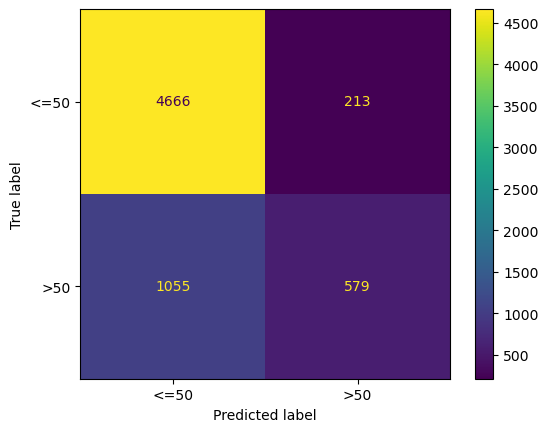

In [263]:
#15
conf=confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels = ['<=50','>50'])
cm_display.plot()



<Axes: >

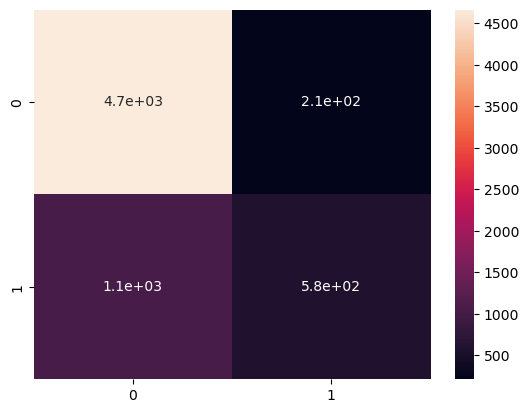

In [264]:
sns.heatmap(conf,annot=True)

In [265]:
#16
print(classification_report(y_test,y_pred,target_names=('<=50','>50')))

              precision    recall  f1-score   support

        <=50       0.82      0.96      0.88      4879
         >50       0.73      0.35      0.48      1634

    accuracy                           0.81      6513
   macro avg       0.77      0.66      0.68      6513
weighted avg       0.79      0.81      0.78      6513



In [266]:
#17
print('Classification accuracy same as accuracy score is',(4666+579)/(len(y_test)))

Classification accuracy same as accuracy score is 0.8053124520190389


In [267]:
#18
print('Accuracy error=',1-accuracy_score(y_test,y_pred))
print('Precision error=',1-precision_score(y_test,y_pred))
print('Recall error=',1-recall_score(y_test,y_pred))
print('F1 error=',1-f1_score(y_test,y_pred))

Accuracy error= 0.1946875479809611
Precision error= 0.2689393939393939
Recall error= 0.6456548347613219
F1 error= 0.5226710634789777


In [268]:
#19
cp=nb.predict_proba(x_test)
dcp=pd.DataFrame(cp,columns=['p(<=50K)','p(>50K)'])
dcp

,p(<=50K),p(>50K)
0,8.224058e-01,1.775942e-01
1,0.000000e+00,1.000000e+00
2,9.996411e-01,3.588512e-04
3,2.203717e-47,1.000000e+00
4,9.972515e-01,2.748518e-03
...,...,...
6508,9.998118e-01,1.882487e-04
6509,9.999999e-01,1.053486e-07
6510,9.968763e-01,3.123654e-03
6511,8.997890e-01,1.002110e-01


Text(0, 0.5, 'Number of values')

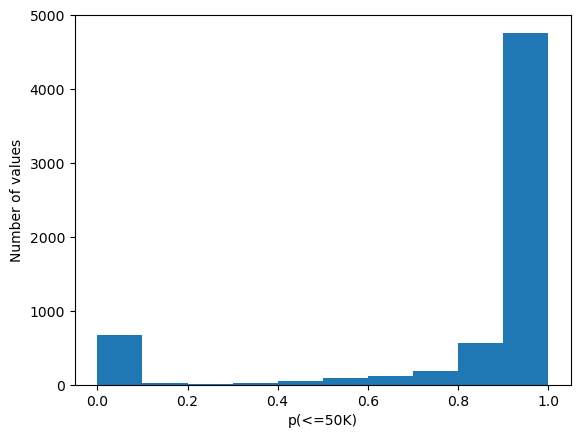

In [269]:
#20
plt.hist(data=dcp,x='p(<=50K)')
plt.xlabel('p(<=50K)')
plt.ylabel('Number of values')


Text(0, 0.5, 'Number of values')

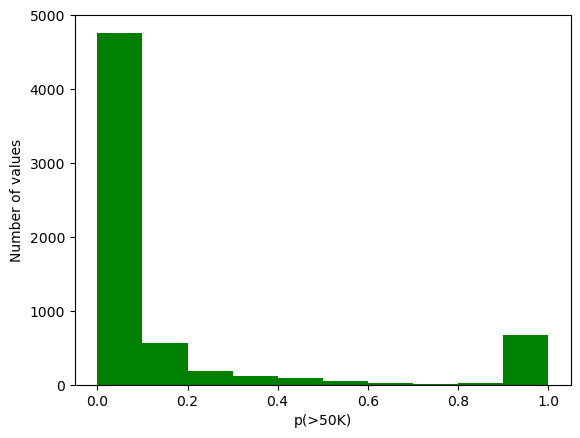

In [270]:

plt.hist(data=dcp,x='p(>50K)',color='green')
plt.xlabel('p(>50K)')
plt.ylabel('Number of values')

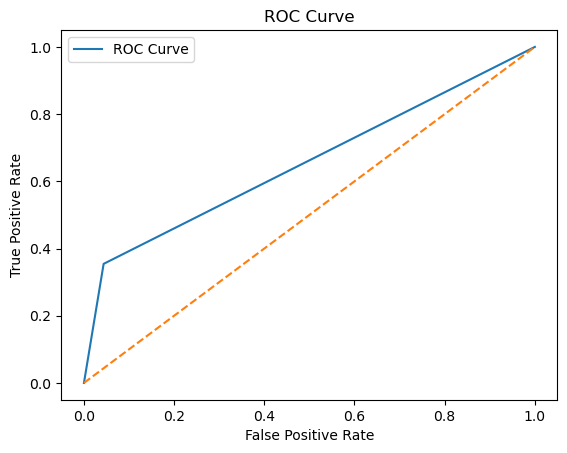

In [271]:
#21
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [272]:
#22
auc=auc(fpr,tpr)
auc

0.6553443391268202

In [273]:
#23,24,25
df[numeric_var]=scaler.fit_transform(df[numeric_var])
cross_categoric_cols=['workclass','education','marital_status','occupation','relationship','race','sex','native_country']
df[cross_categoric_cols]=df[cross_categoric_cols].apply(le.fit_transform)
tv=np.array(target_variable).ravel()

In [274]:
# Perform 10-fold cross-validation for accuracy and roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(nb, df.iloc[:,0:14],tv, cv=cv, scoring='accuracy')
cv1_scores = cross_val_score(nb,df.iloc[:,0:14],tv,cv=cv, scoring='roc_auc')

# Calculate average cross-validated accuracy score and roc_auc
avg_cv_accuracy = np.mean(cv_scores)
avg1_cv_score = np.mean(cv1_scores)
print("Cross-Validated Accuracy Scores:", cv_scores)
print("Average Cross-Validated Accuracy:", avg_cv_accuracy)
print("Cross-Validated ROC AUC Scores:", cv1_scores)
print("Average Cross-Validated ROC AUC:", avg1_cv_score)

Cross-Validated Accuracy Scores: [0.80749156 0.80497543 0.80251843 0.79821867 0.80436118 0.79760442
 0.8034398  0.80589681 0.80159705 0.81388206]
Average Cross-Validated Accuracy: 0.8039985414141079
Cross-Validated ROC AUC Scores: [0.85508343 0.84194845 0.85391641 0.85837967 0.8653555  0.85608406
 0.86018767 0.86309369 0.85363572 0.8568054 ]
Average Cross-Validated ROC AUC: 0.8564490009410479
